# **SCATTER PLOT ANALYSIS**

#### IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

CONNECT TO DATABASE

In [3]:
# Connect to Database
conn = sqlite3.connect('my_analysis.db')

# Check
query = "SELECT * FROM main LIMIT 5"
pd.read_sql_query(query, conn)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


---

#### EXPLORING RELATIONSHIPS WITH SCATTER PLOTS

Scatter Plot for Age vs. Job Satisfaction

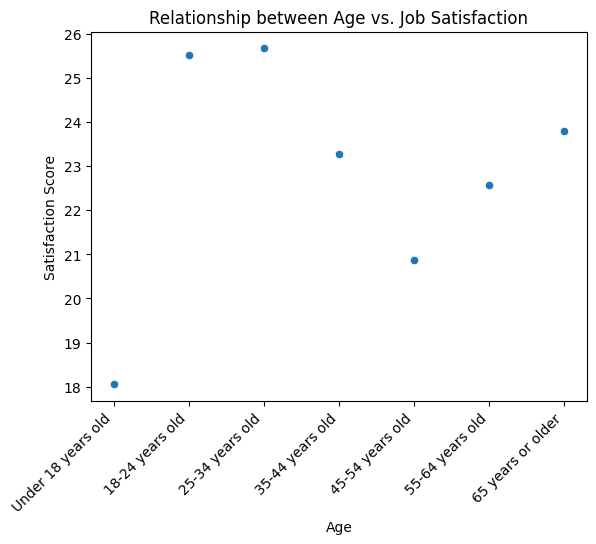

Correlation Coefficient: 0.09827661029516245


In [4]:
# Query the data
query = "SELECT Age, JobSatPoints_6 AS JobSat6 FROM main WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
age_job = pd.read_sql_query(query, conn)


# Create Order logic for Age column
age_order = ['Under 18 years old','18-24 years old', 
             '25-34 years old', '35-44 years old', '45-54 years old',
             '55-64 years old', '65 years or older', 'Prefer not to say']

# Convert to categories
age_job['Age'] = pd.Categorical(age_job['Age'], categories=age_order, ordered=True)

# Calculate the mean for satisfaction score
age_satisfaction = age_job.groupby('Age', observed=False)['JobSat6'].mean().reset_index()

# SCATTER PLOT
plot_df = age_satisfaction[age_satisfaction['Age'] != 'Prefer not to say'].copy()

sns.scatterplot(plot_df, x='Age', y='JobSat6')

plt.title("Relationship between Age vs. Job Satisfaction")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=45, ha='right')

plt.show()

# Check correlation coefficient
age_map = {'Under 18 years old': 17,
           '18-24 years old': 21, 
           '25-34 years old': 29.5, 
           '35-44 years old': 39.5, 
           '45-54 years old': 49.5,
           '55-64 years old': 59.5, 
           '65 years or older': 65}

plot_df['Num_Age'] = plot_df['Age'].map(age_map)

print(f"Correlation Coefficient: {plot_df['Num_Age'].corr(plot_df['JobSat6'])}")

---

Scatter Plot for Compensation (ConvertedCompYearly) vs. Job Satisfaction (JobSatPoints_6)

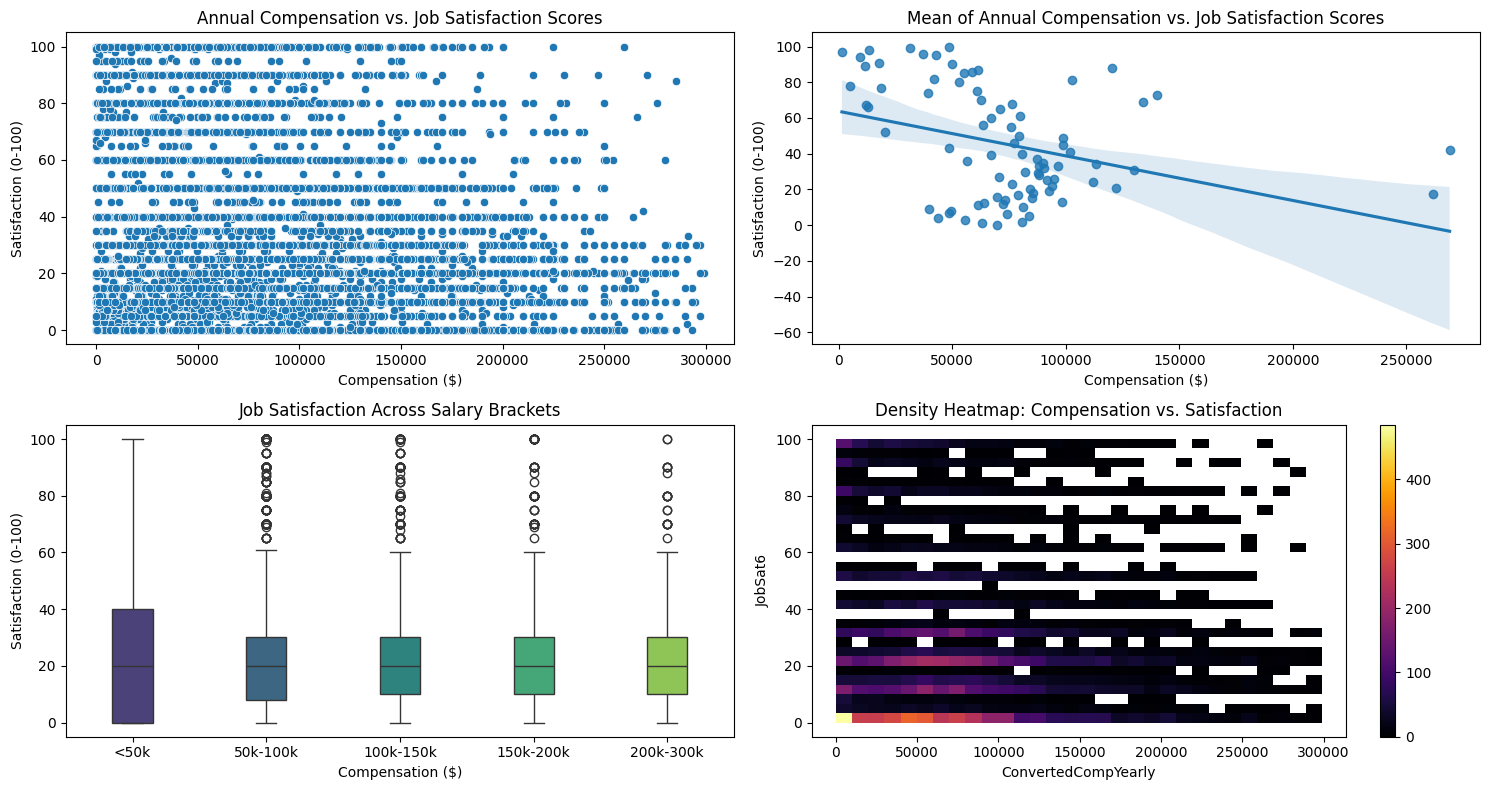

Correlation Coeff: -0.015096207426175935
Correlation Coeff of Mean Comp: -0.3611099450065069


In [5]:
# Query the data
query = "SELECT ConvertedCompYearly, JobSatPoints_6 AS JobSat6, YearsCodePro FROM main WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL"
comp_sat = pd.read_sql_query(query, conn)

# Filter compensation to under 300000 (reasonable value)
filtered = comp_sat[comp_sat['ConvertedCompYearly'] < 300000].copy()

# Create a subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

# Scatter Plot original
sns.scatterplot(filtered, x='ConvertedCompYearly', y='JobSat6', ax=axes[0])
axes[0].set_title("Annual Compensation vs. Job Satisfaction Scores")
axes[0].set_xlabel("Compensation ($)")
axes[0].set_ylabel("Satisfaction (0-100)")

# Scatter Plot Mean of Compensation
# Mean Data
comp_mean = filtered.groupby('JobSat6')['ConvertedCompYearly'].mean().reset_index()

sns.regplot(comp_mean, x='ConvertedCompYearly', y='JobSat6', ax=axes[1])
axes[1].set_title("Mean of Annual Compensation vs. Job Satisfaction Scores")
axes[1].set_xlabel("Compensation ($)")
axes[1].set_ylabel("Satisfaction (0-100)")

# Box Plot (turn compensation into brackets)
bins = [-1, 50000, 100000, 150000, 200000, 300000]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k']
filtered['Salary_Bracket'] = pd.cut(filtered['ConvertedCompYearly'], bins=bins, labels=labels)

sns.boxplot(filtered, x='Salary_Bracket', y='JobSat6', palette='viridis', ax=axes[2], width=0.3, hue='Salary_Bracket', legend=False)
axes[2].set_title("Job Satisfaction Across Salary Brackets")
axes[2].set_xlabel("Compensation ($)")
axes[2].set_ylabel("Satisfaction (0-100)")


# Heatmap (Best for 'True' Data Density)
# 'bins' controls how pixelated the heatmap is
sns.histplot(data=filtered, x='ConvertedCompYearly', y='JobSat6', bins=30, cbar=True, cmap='inferno',ax=axes[3])
axes[3].set_title("Density Heatmap: Compensation vs. Satisfaction")

plt.tight_layout()
plt.show()


# Correlation Calculate
print(f"Correlation Coeff: {filtered['ConvertedCompYearly'].corr(filtered['JobSat6'], method='spearman')}")
print(f"Correlation Coeff of Mean Comp: {comp_mean['ConvertedCompYearly'].corr(comp_mean['JobSat6'], method='spearman')}")

While individual job satisfaction varies wildly (Raw Corr: -0.01), there is a visible negative trend at the aggregate level (Mean Corr: -0.36). Higher compensation brackets show slightly lower average satisfaction, likely due to increased stress or responsibility, though the median satisfaction remains relatively stable across all income levels

#### FIND P-VALUE TO VALIDATE THE CORRELATION

In [6]:
from scipy import stats

# --- CALCULATE P-VALUE FOR INDIVIDUAL DATA ---

# Clean missing values
clean_data = filtered[['ConvertedCompYearly', 'JobSat6']].dropna()

# Calculate Spearman Correlation (Best for Numeric (Compensation) vs. Rank data (JobSat))
corr_coef, p_value = stats.spearmanr(clean_data['ConvertedCompYearly'], clean_data['JobSat6'])

# Print the result
print(f"Spearman Correlation: {corr_coef:.4f}")
print(f"P-Value: {p_value:.30f}") #.30f prevents it from showing as '0.00000e-10'

# Logic check
alpha = 0.05
if p_value < alpha:
    print("Resul is statistically Significant (Real)")
else:
    print("Result is likely Random Noise (Not Real)")

Spearman Correlation: -0.0151
P-Value: 0.057286050081080341911388131848
Result is likely Random Noise (Not Real)


In [7]:
# --- CALCULATE P-VALUE FOR AGGREGATED DATA ---

# Calculate spearman value
corr_coef, p_value = stats.spearmanr(comp_mean['ConvertedCompYearly'], comp_mean['JobSat6'])

# Print result
print(f"Aggregated Correlation: {corr_coef:.4f}")
print(f"Aggregated P-Value: {p_value:.30f}")

alpha = 0.05
if p_value < alpha:
    print("Resul is statistically Significant (Real)")
else:
    print("Result is likely Random Noise (Not Real)")

Aggregated Correlation: -0.3611
Aggregated P-Value: 0.000796795377713177023493162920
Resul is statistically Significant (Real)


#### **Conclusion: The Paradox of Pay and Satisfaction**

1. At the Individual Level: We found no statistically significant link between a specific person's salary and their happiness (Correlation: -0.01 p-value: 0.08). Knowing someone's salary does not predict their satisfaction.

2. At the Structural Level: However, when we aggregate respondents into groups, a clear negative trend emerges (Correlation: -0.36, p-value: < 0.001).


**Final Verdict**: While money itself doesn't make individuals unhappy, higher-paying roles systematically correlate with lower average satisfaction scores. This suggests that the conditions associated with high-paying jobs (likely stress, responsibility, or legacy tech) exert a negative pressure on satisfaction that becomes visible only at the aggregate level.

<Figure size 1000x600 with 0 Axes>

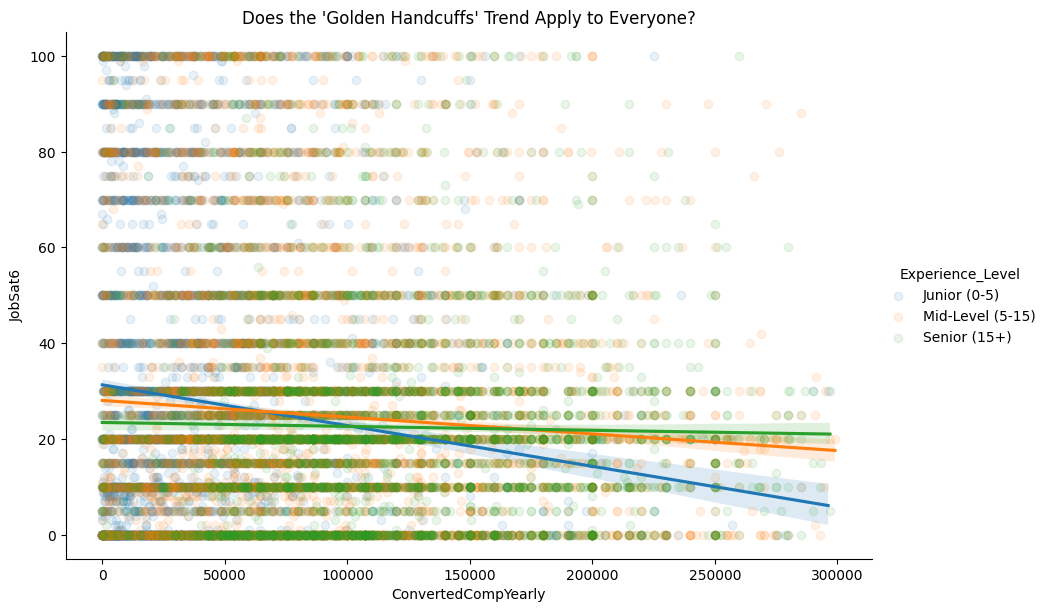

In [18]:
# Fix YearsCodePro values
years_map = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}

filtered['YearsCodePro'] = filtered['YearsCodePro'].replace(years_map).astype('int')

# Create a quick category for experience so we can color-code it
# 0-5 years = Junior, 5-15 = Mid, 15+ = Senior
bins = [0, 5, 15, 50]
labels = ['Junior (0-5)', 'Mid-Level (5-15)', 'Senior (15+)']
filtered['Experience_Level'] = pd.cut(filtered['YearsCodePro'], bins=bins, labels=labels)

# Plot the same regression, but split by Experience Level
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=filtered, 
    x='ConvertedCompYearly', 
    y='JobSat6', 
    hue='Experience_Level',  # This splits the data into 3 lines!
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha':0.1}
)

plt.title("Does the 'Golden Handcuffs' Trend Apply to Everyone?")
plt.show()

**"Compensation vs. Satisfaction: The Junior Trap"** While the aggregate analysis suggested a general negative trend between pay and satisfaction (p < 0.001), segmentation by experience reveals a crucial nuance:

* Juniors (0-5 Years): Exhibit a strong negative correlation. High compensation appears to come with 'Golden Handcuffs'—high stress or poor work-life balance—leading to significantly lower satisfaction.

* Seniors (15+ Years): Show no significant correlation. Their satisfaction remains stable regardless of compensation, suggesting that for veteran developers, non-monetary factors (autonomy, culture) drive happiness.

---

Enhancing Scatter Plots

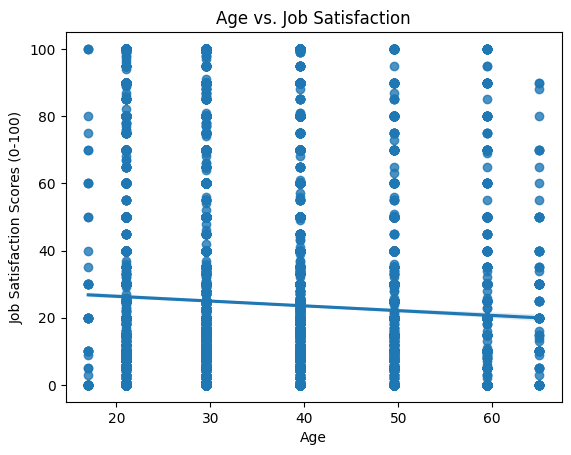

In [30]:
# Scatter Plot with Trend Line for Age vs. Job Satisfaction

query = "SELECT Age, JobSatPoints_6 AS JobSat6 FROM main WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND Age != 'Prefer not to say'"
age_sat = pd.read_sql_query(query, conn)

# Fix Order in age column
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}

age_sat['Num_Age'] = age_sat['Age'].map(age_map)

# Scatter Plot
sns.regplot(age_sat, x='Num_Age', y='JobSat6')
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Scores (0-100)')

plt.show()

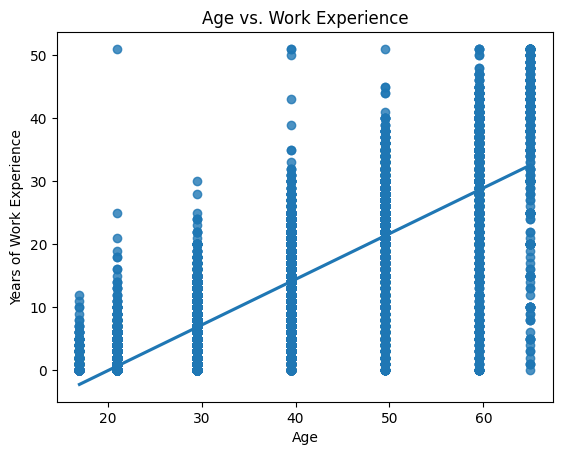

In [32]:
# Scatter Plot for Age vs. Work Experience
query = "SELECT Age, YearsCodePro FROM main WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL"
age_exp = pd.read_sql_query(query, conn)

# Fix age and yearscode values
years_map = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}
age_exp['YearsCodePro'] = age_exp['YearsCodePro'].replace(years_map).astype('int')

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}
age_exp['Num_Age'] = age_exp['Age'].map(age_map)

# Scatter Plot
sns.regplot(age_exp, x='Num_Age', y='YearsCodePro')
plt.title("Age vs. Work Experience")
plt.xlabel('Age')
plt.ylabel('Years of Work Experience')

plt.show()

---

#### COMBINING SCATTER PLOTS WITH ADDITIONAL FEATURES

Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size

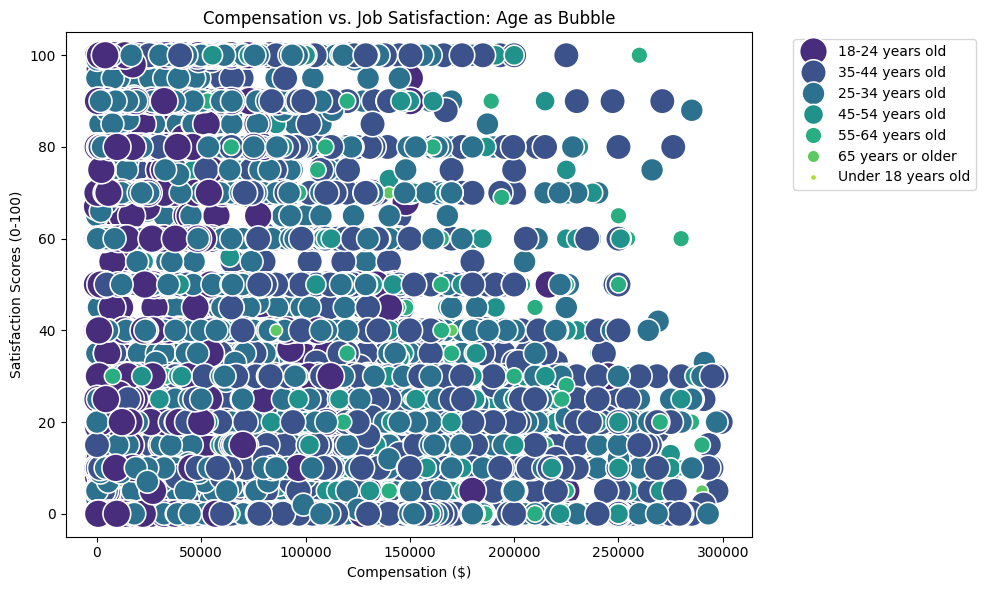

In [42]:
query = "SELECT ConvertedCompYearly, JobSatPoints_6 AS JobSat6, Age FROM main WHERE Age != 'Prefer not to say' AND ConvertedCompYearly < 300000"
comp_satage = pd.read_sql_query(query, conn).dropna()

# Bubble Plot
plt.figure(figsize=(10,6))

sns.scatterplot(comp_satage, x='ConvertedCompYearly', y='JobSat6', size='Age', sizes=(20, 400), palette='viridis', hue='Age')
plt.title('Compensation vs. Job Satisfaction: Age as Bubble')
plt.xlabel('Compensation ($)')
plt.ylabel('Satisfaction Scores (0-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Scatter Plot for Popular Programming Languages by Job Satisfaction

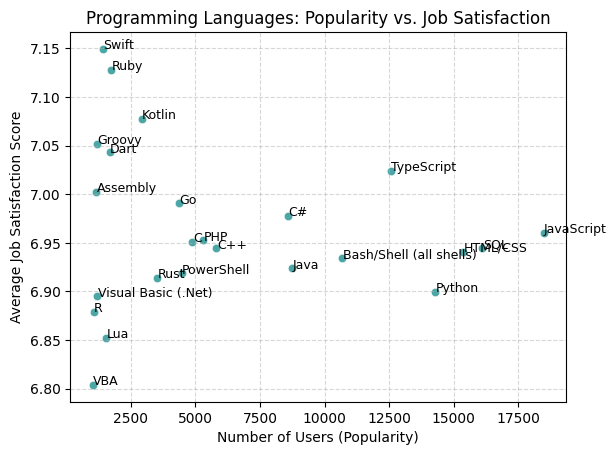

In [65]:
query = "SELECT LanguageHaveWorkedWith AS Language, JobSat FROM main"
lang_sat = pd.read_sql_query(query, conn).dropna()

# Split language values
lang_sat['Clean_Language'] = lang_sat['Language'].str.split(';')
clean_langsat = lang_sat.explode('Clean_Language')

# Aggregate: Calculate Popularity (Count) and Satisfaction (Mean)
lang_stats = clean_langsat.groupby('Clean_Language').agg(
    Popularity =('JobSat', 'count'),
    Avg_Satisfaction =('JobSat', 'mean')
).sort_values('Popularity', ascending=False).reset_index()

# Filter by popularity
lang_stats = lang_stats[lang_stats['Popularity'] > 1000]

# Scatter Plot
sns.scatterplot(lang_stats, x='Popularity', y='Avg_Satisfaction', sizes=100, color='teal', alpha=0.7)

# Add Labels
for i in range(lang_stats.shape[0]):
    plt.text(
        lang_stats.Popularity.iloc[i]+20,       # x position (slightly right)
        lang_stats.Avg_Satisfaction.iloc[i],    # y position
        lang_stats.Clean_Language.iloc[i],      # The text
        fontsize=9
    )
plt.title('Programming Languages: Popularity vs. Job Satisfaction')
plt.xlabel('Number of Users (Popularity)')
plt.ylabel('Average Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


---

SCATTER PLOT COMPARISONS ACROSS GROUPS

Scatter Plot for Compensation vs. Job Satisfaction by Employment Type

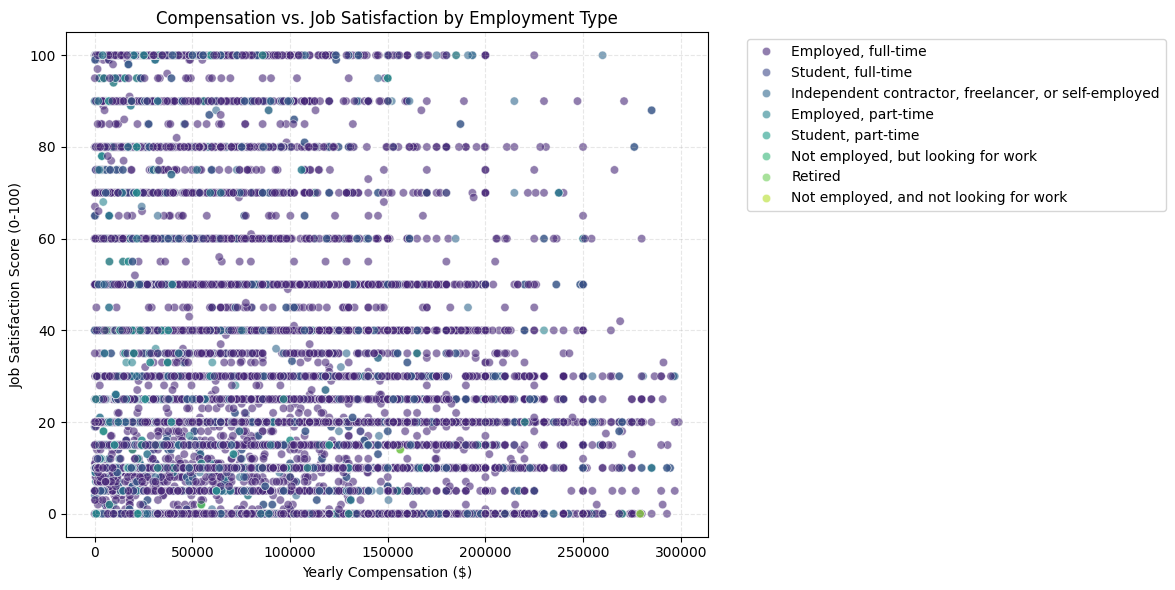

In [79]:
query = "SELECT ConvertedCompYearly AS compensation, JobSatPoints_6 AS jobsat, Employment AS emp FROM main"
compsat_emp = pd.read_sql_query(query, conn).dropna()

# Split employment values
compsat_emp['clean_emp'] = compsat_emp['emp'].str.split(';')
plot_df = compsat_emp[compsat_emp['compensation'] < 300000].explode('clean_emp')

plt.figure(figsize=(12,6))

sns.scatterplot(plot_df, x='compensation', y='jobsat', palette='viridis', hue='clean_emp', alpha=0.6)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation ($)')
plt.ylabel('Job Satisfaction Score (0-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

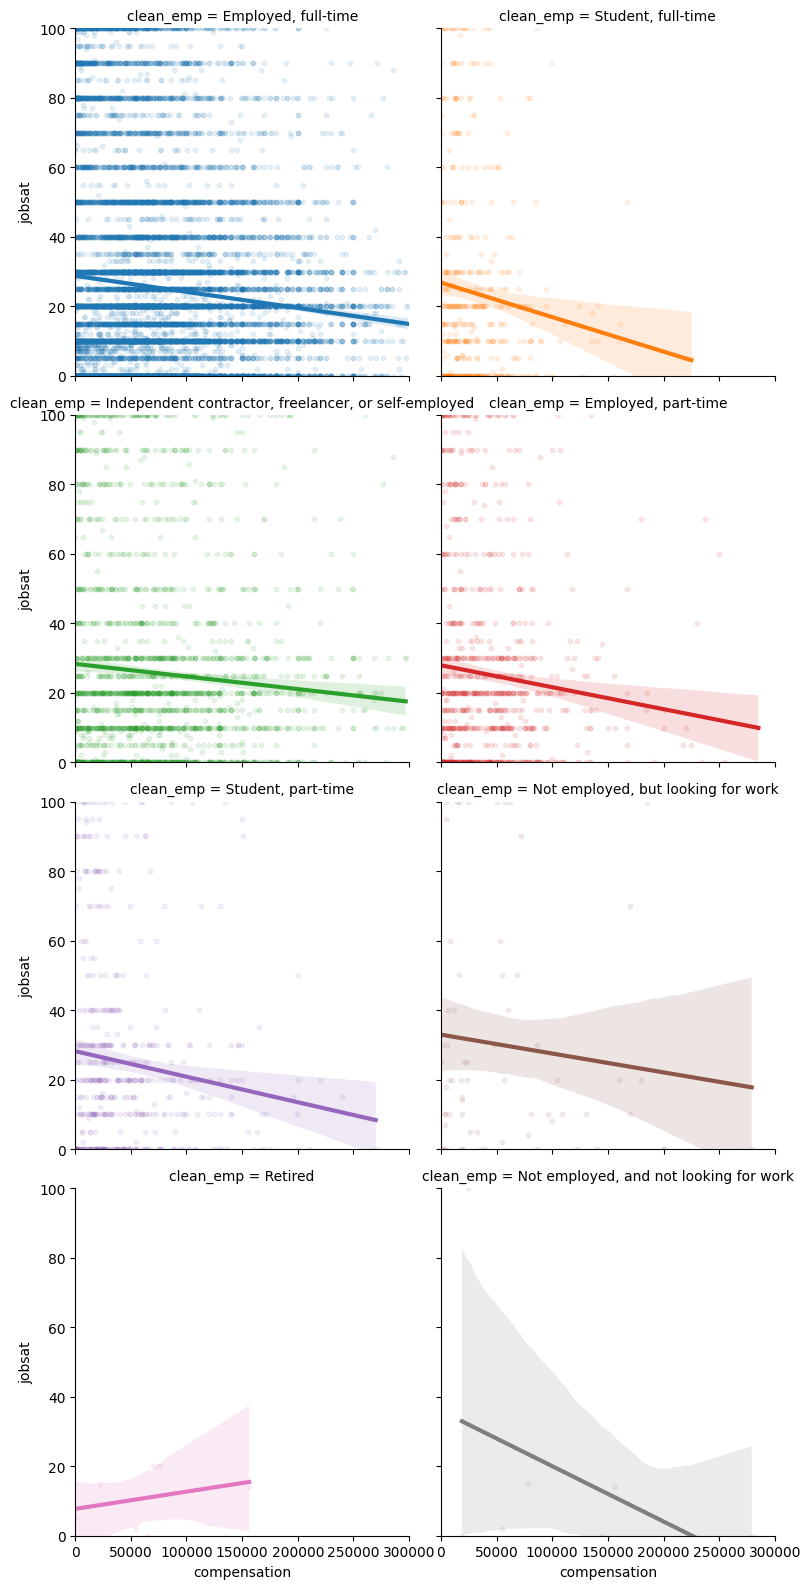

In [82]:
# 2. The Relationship Plot (lmplot)
# col='Employment' splits the charts side-by-side
# scatter_kws={'alpha': 0.1} fades the dots so you focus on the LINE
sns.lmplot(
    data=plot_df, 
    x='compensation', 
    y='jobsat', 
    col='clean_emp',     # <--- Creates 1 chart per employment type
    hue='clean_emp',     # Colors them nicely
    col_wrap=2,           # Arranges them in a 2x2 grid
    height=4, 
    scatter_kws={'alpha': 0.1, 's': 10}, # Make dots tiny and faint
    line_kws={'linewidth': 3}            # Make the trend line THICK
)

# Limit X-axis if you have extreme outliers (e.g., > $300k)
plt.xlim(0, 300000) 
plt.ylim(0, 100)
plt.show()

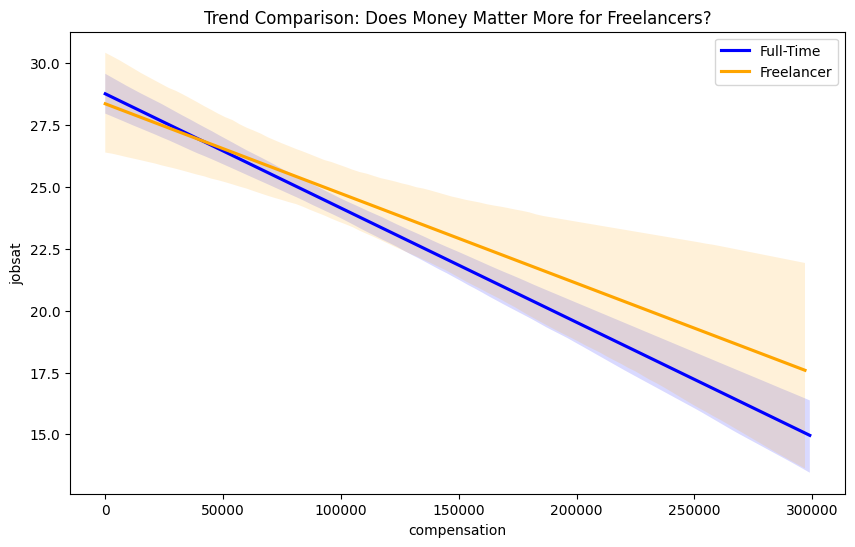

In [85]:
plt.figure(figsize=(10, 6))

sns.regplot(
    data=plot_df[plot_df['clean_emp'] == 'Employed, full-time'], 
    x='compensation', y='jobsat', 
    scatter=False, label='Full-Time', color='blue'
)

sns.regplot(
    data=plot_df[plot_df['clean_emp'] == 'Independent contractor, freelancer, or self-employed'], 
    x='compensation', y='jobsat', 
    scatter=False, label='Freelancer', color='orange'
)

plt.legend()
plt.title("Trend Comparison: Does Money Matter More for Freelancers?")
plt.show()

---

Scatter Plot for Work Experience vs. Age Group by Country

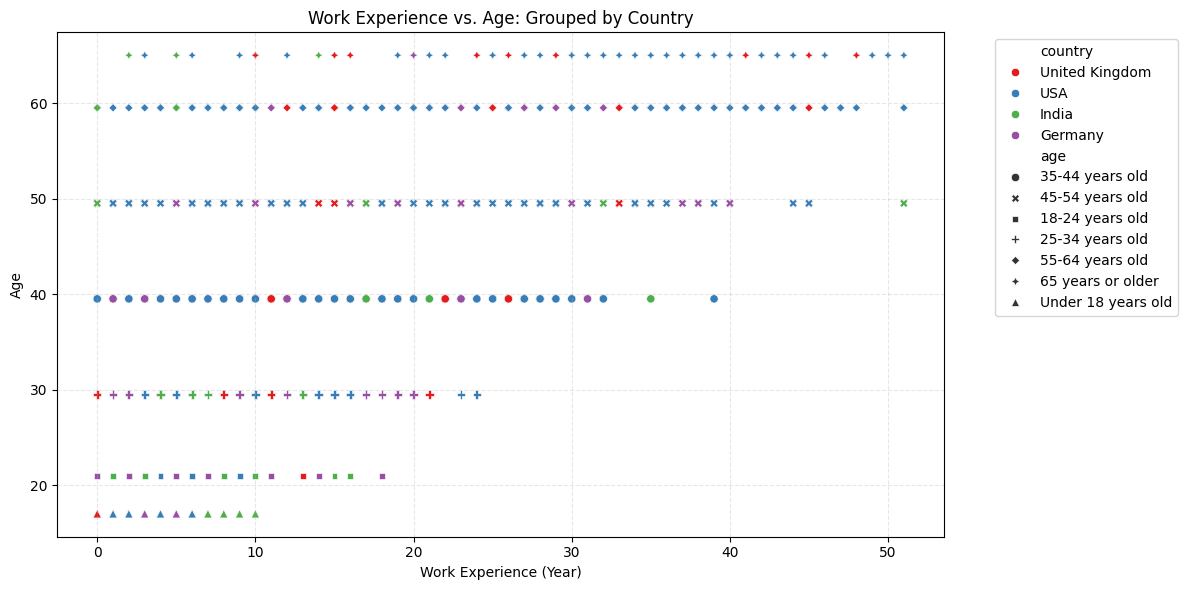

In [104]:
query = "SELECT YearsCodePro AS workexp, Age AS age, Country AS country FROM main WHERE Age != 'Prefer not to say'"
awc_data = pd.read_sql_query(query, conn).dropna()

# Fix Values to numeric
years_map = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}
awc_data['workexp'] = awc_data['workexp'].replace(years_map).astype('int')

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}
awc_data['num_age'] = awc_data['age'].map(age_map)

# Get top 4 countries by respondents
top_country = awc_data['country'].value_counts().nlargest(4).index
awc_data = awc_data[awc_data['country'].isin(top_country)]

country_name = {
    'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
    'United States of America' : 'USA'
}
awc_data['country'] = awc_data['country'].replace(country_name)


# Scatter Plot
plt.figure(figsize=(12,6))
sns.scatterplot(awc_data, x='workexp', y='num_age', hue='country', palette='Set1', style='age', sizes=100)

plt.title('Work Experience vs. Age: Grouped by Country')
plt.xlabel('Work Experience (Year)')
plt.ylabel('Age')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

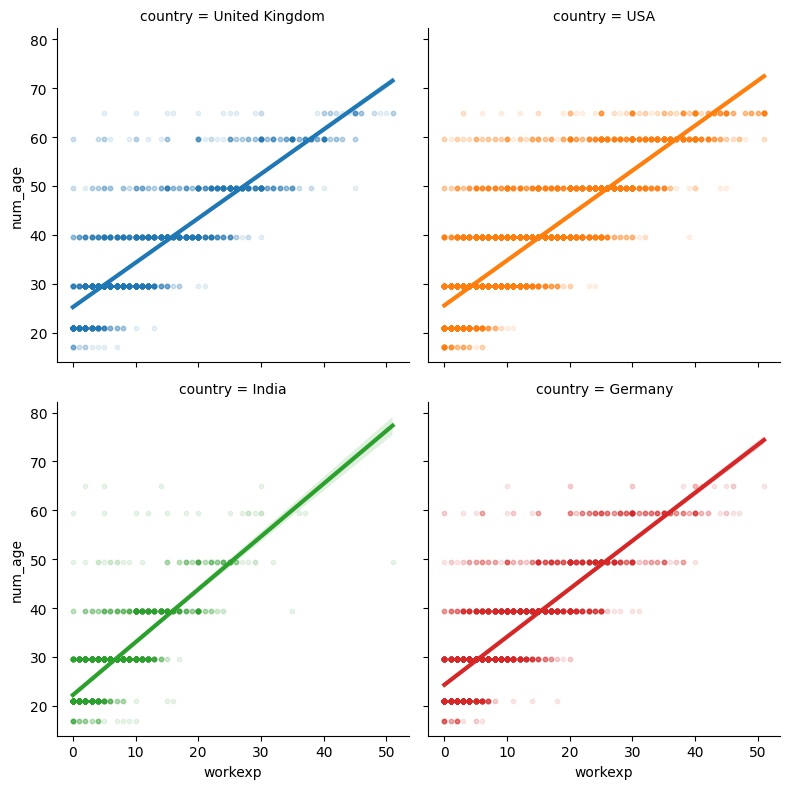

In [98]:
sns.lmplot(
    awc_data, 
    x='workexp', 
    y='num_age', 
    col='country', 
    hue='country', 
    col_wrap= 2, 
    height= 4, 
    scatter_kws={'alpha': 0.1, 's': 10},
    line_kws={'linewidth': 3})

plt.show()

---

In [105]:
conn.close()

---

#### **SUMMARY**

- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.